In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nltk

In [4]:
data= pd.read_csv('C:/Users/Owner/Downloads/Ait 580 project/500_Cities__Local_Data_for_Better_Health__2019_release.csv')

In [5]:
data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,DataValueTypeID,...,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,Latitude,Longitude,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031612000,All teeth lost among adults aged >=65 Years,CrdPrv,...,24.5,39.9,1545,41.797847,-87.652536,HLTHOUT,TEETHLOST,1714000.0,1.703161e+10,Teeth Loss
1,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Prevention,1714000-17031660700,Visits to dentist or dental clinic among adult...,CrdPrv,...,37.9,46.3,2366,41.773845,-87.681095,PREVENT,DENTAL,1714000.0,1.703166e+10,Dental Visit
2,2017,IL,Illinois,Decatur,Census Tract,BRFSS,Health Outcomes,1718823-17115001100,Current asthma among adults aged >=18 Years,CrdPrv,...,9.5,10.5,3485,39.849665,-88.907327,HLTHOUT,CASTHMA,1718823.0,1.711500e+10,Current Asthma
3,2016,IL,Illinois,Joliet,Census Tract,BRFSS,Health Outcomes,1738570-17197881603,All teeth lost among adults aged >=65 Years,CrdPrv,...,15.6,27.4,3301,41.540542,-88.133133,HLTHOUT,TEETHLOST,1738570.0,1.719788e+10,Teeth Loss
4,2017,IL,Illinois,Elgin,Census Tract,BRFSS,Health Outcomes,1723074-17031804405,High cholesterol among adults aged >=18 Years ...,CrdPrv,...,25.0,26.3,3632,42.034942,-88.246250,HLTHOUT,HIGHCHOL,1723074.0,1.703180e+10,High Cholesterol


In [17]:
G = nx.from_pandas_edgelist(data, 'StateAbbr', 'Short_Question_Text')
G.nodes()

NodeView(('IL', 'Teeth Loss', 'Dental Visit', 'Current Asthma', 'High Cholesterol', 'Sleep <7 hours', 'Diabetes', 'Obesity', 'Cancer (except skin)', 'Stroke', 'Mental Health', 'Current Smoking', 'Cholesterol Screening', 'Pap Smear Test', 'US', 'Health Insurance', 'Coronary Heart Disease', 'Annual Checkup', 'Chronic Kidney Disease', 'Binge Drinking', 'Physical Inactivity', 'Arthritis', 'Mammography', 'Taking BP Medication', 'Colorectal Cancer Screening', 'Physical Health', 'Core preventive services for older women', 'High Blood Pressure', 'Core preventive services for older men', 'COPD', 'AL', 'MI', 'NY', 'MA', 'AK', 'AZ', 'NM', 'IN', 'NJ', 'NH', 'NV', 'KS', 'IA', 'AR', 'CA', 'LA', 'KY', 'MD', 'ME', 'MN', 'MO', 'MS', 'NE', 'MT', 'PA', 'OH', 'OK', 'CO', 'NC', 'CT', 'DE', 'DC', 'FL', 'ND', 'TX', 'GA', 'HI', 'OR', 'ID', 'TN', 'WI', 'WA', 'WV', 'VA', 'UT', 'VT', 'WY', 'RI', 'SC', 'SD'))

In [18]:
G.edges()

EdgeView([('IL', 'Teeth Loss'), ('IL', 'Dental Visit'), ('IL', 'Current Asthma'), ('IL', 'High Cholesterol'), ('IL', 'Sleep <7 hours'), ('IL', 'Diabetes'), ('IL', 'Obesity'), ('IL', 'Cancer (except skin)'), ('IL', 'Stroke'), ('IL', 'Mental Health'), ('IL', 'Current Smoking'), ('IL', 'Cholesterol Screening'), ('IL', 'Pap Smear Test'), ('IL', 'Coronary Heart Disease'), ('IL', 'Annual Checkup'), ('IL', 'Chronic Kidney Disease'), ('IL', 'Binge Drinking'), ('IL', 'Physical Inactivity'), ('IL', 'Arthritis'), ('IL', 'Mammography'), ('IL', 'Taking BP Medication'), ('IL', 'Colorectal Cancer Screening'), ('IL', 'Physical Health'), ('IL', 'Core preventive services for older women'), ('IL', 'High Blood Pressure'), ('IL', 'Core preventive services for older men'), ('IL', 'Health Insurance'), ('IL', 'COPD'), ('Teeth Loss', 'AL'), ('Teeth Loss', 'MA'), ('Teeth Loss', 'IN'), ('Teeth Loss', 'NY'), ('Teeth Loss', 'IA'), ('Teeth Loss', 'KS'), ('Teeth Loss', 'AR'), ('Teeth Loss', 'KY'), ('Teeth Loss', 'LA

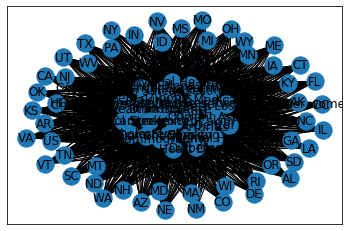

In [20]:
nx.draw_networkx(G, with_labels=True)

(-1.0598003847398818,
 1.105840943587674,
 -1.0468330658326368,
 1.0761469800487249)

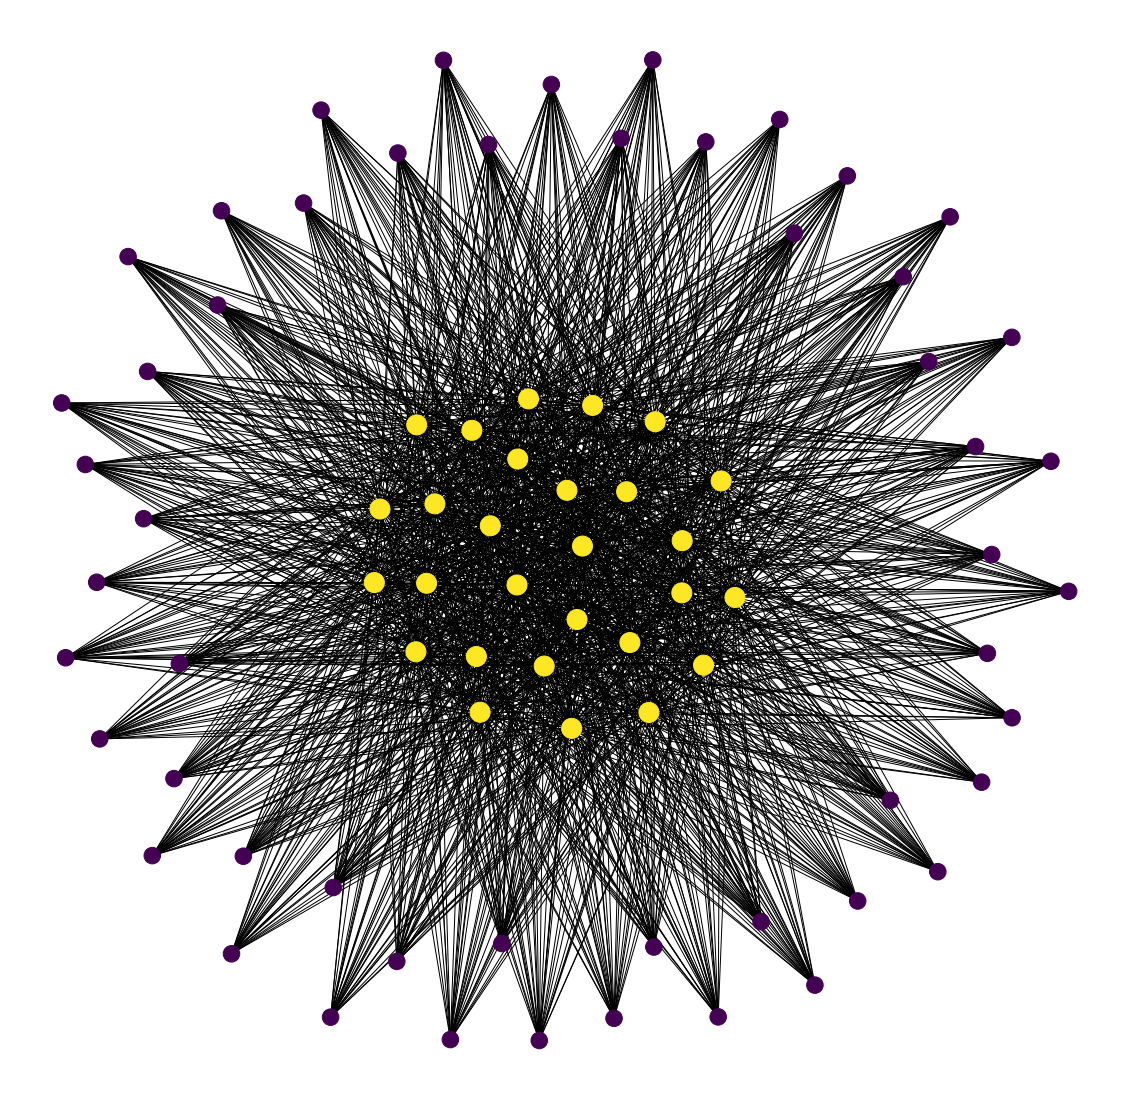

In [28]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [21]:
nx.density(G)

0.4607594936708861

In [22]:
nx.average_shortest_path_length(G)

1.539240506329114

In [24]:
nx.average_degree_connectivity(G)

{28: 52.0, 52: 28.0}

In [10]:
fdist = nltk.FreqDist(data.Short_Question_Text)
for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

Dental Visit;29006
Current Asthma;29006
High Cholesterol;29006
Sleep <7 hours;29006
Diabetes;29006
Obesity;29006
Cancer (except skin);29006
Stroke;29006
Mental Health;29006
Current Smoking;29006


In [6]:
import pip
pip.main(['install', '--user', 'wordcloud'])

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [11]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist)

(-0.5, 799.5, 399.5, -0.5)

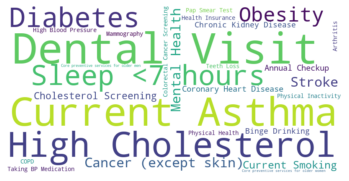

In [12]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")